## Churn Prediction (Telecoms Data)

<p>In this project, we will see how we can use data collected by a telecoms company to estimate whether or not the person will churn. Let's start by loading in the packages we're going to need.</p>

In [180]:
# Import all packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

%matplotlib inline

In [181]:
# Load dataset

df = pd.read_excel('Churn.xls')

In [148]:
# View data

df.head()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Churn,Int'l Plan,VMail Plan,...,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,State,Area Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,0,0,1,...,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,0,0,1,...,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,0,0,0,...,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,0,1,0,...,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,0,1,0,...,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
Account Length    3333 non-null int64
VMail Message     3333 non-null int64
Day Mins          3333 non-null float64
Eve Mins          3333 non-null float64
Night Mins        3333 non-null float64
Intl Mins         3333 non-null float64
CustServ Calls    3333 non-null int64
Churn             3333 non-null int64
Int'l Plan        3333 non-null int64
VMail Plan        3333 non-null int64
Day Calls         3333 non-null int64
Day Charge        3333 non-null float64
Eve Calls         3333 non-null int64
Eve Charge        3333 non-null float64
Night Calls       3333 non-null int64
Night Charge      3333 non-null float64
Intl Calls        3333 non-null int64
Intl Charge       3333 non-null float64
State             3333 non-null object
Area Code         3333 non-null int64
Phone             3333 non-null object
dtypes: float64(8), int64(11), object(2)
memory usage: 546.9+ KB


In [27]:
df.describe()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Churn,Int'l Plan,VMail Plan,Day Calls,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,Area Code
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,200.980348,200.872037,10.237294,1.562856,0.144914,0.096910,0.276628,100.435644,30.562307,100.114311,17.083540,100.107711,9.039325,4.479448,2.764581,437.182418
std,39.822106,13.688365,54.467389,50.713844,50.573847,2.791840,1.315491,0.352067,0.295879,0.447398,20.069084,9.259435,19.922625,4.310668,19.568609,2.275873,2.461214,0.753773,42.371290
min,1.000000,0.000000,0.000000,0.000000,23.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,1.040000,0.000000,0.000000,408.000000
25%,74.000000,0.000000,143.700000,166.600000,167.000000,8.500000,1.000000,0.000000,0.000000,0.000000,87.000000,24.430000,87.000000,14.160000,87.000000,7.520000,3.000000,2.300000,408.000000
50%,101.000000,0.000000,179.400000,201.400000,201.200000,10.300000,1.000000,0.000000,0.000000,0.000000,101.000000,30.500000,100.000000,17.120000,100.000000,9.050000,4.000000,2.780000,415.000000
75%,127.000000,20.000000,216.400000,235.300000,235.300000,12.100000,2.000000,0.000000,0.000000,1.000000,114.000000,36.790000,114.000000,20.000000,113.000000,10.590000,6.000000,3.270000,510.000000
max,243.000000,51.000000,350.800000,363.700000,395.000000,20.000000,9.000000,1.000000,1.000000,1.000000,165.000000,59.640000,170.000000,30.910000,175.000000,17.770000,20.000000,5.400000,510.000000


Text(0.5,1,'Churn vs Retain - Night Calls')

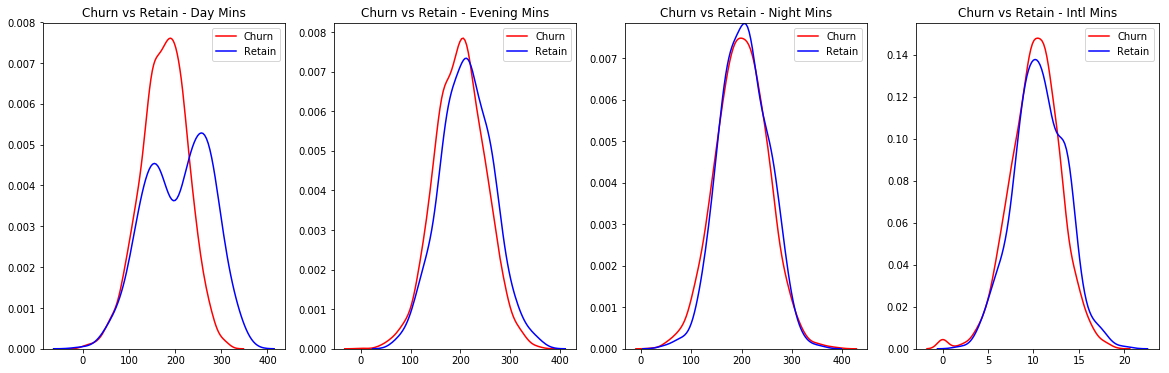

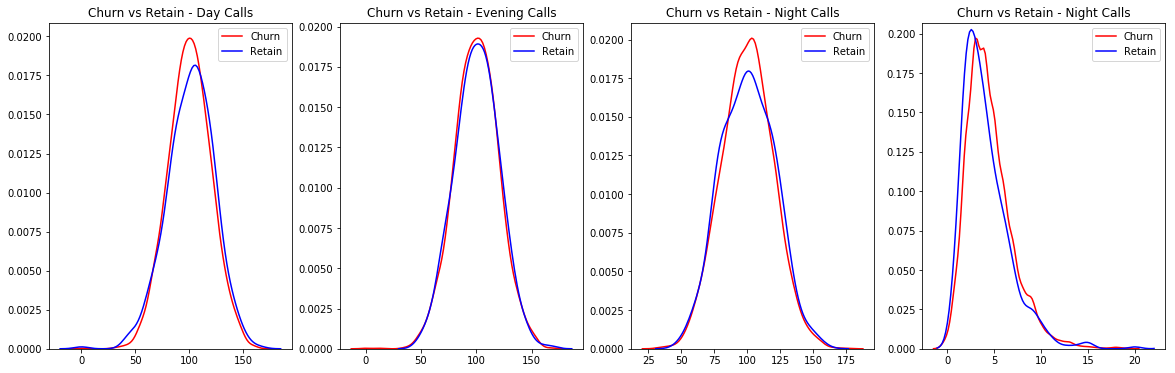

In [150]:
# Plot a few of the features to see their distributions for Churned Vs. Retained people

fig, ax = plt.subplots(1,4,figsize=(20,6))

sns.kdeplot(df.loc[(df['Churn'] == 0) ]['Day Mins'], ax=ax[0], color="r", label='Churn')
sns.kdeplot(df.loc[(df['Churn'] == 1) ]['Day Mins'], ax=ax[0], color="b", label='Retain')
ax[0].set_title('Churn vs Retain - Day Mins')

sns.kdeplot(df.loc[(df['Churn'] == 0) ]['Eve Mins'], ax=ax[1], color="r", label='Churn')
sns.kdeplot(df.loc[(df['Churn'] == 1) ]['Eve Mins'], ax=ax[1], color="b", label='Retain')
ax[1].set_title('Churn vs Retain - Evening Mins')

sns.kdeplot(df.loc[(df['Churn'] == 0) ]['Night Mins'], ax=ax[2], color="r", label='Churn')
sns.kdeplot(df.loc[(df['Churn'] == 1) ]['Night Mins'], ax=ax[2], color="b", label='Retain')
ax[2].set_title('Churn vs Retain - Night Mins')

sns.kdeplot(df.loc[(df['Churn'] == 0) ]['Intl Mins'], ax=ax[3], color="r", label='Churn')
sns.kdeplot(df.loc[(df['Churn'] == 1) ]['Intl Mins'], ax=ax[3], color="b", label='Retain')
ax[3].set_title('Churn vs Retain - Intl Mins')


fig, ax1 = plt.subplots(1,4,figsize=(20,6))

sns.kdeplot(df.loc[(df['Churn'] == 0) ]['Day Calls'], ax=ax1[0], color="r", label='Churn')
sns.kdeplot(df.loc[(df['Churn'] == 1) ]['Day Calls'], ax=ax1[0], color="b", label='Retain')
ax1[0].set_title('Churn vs Retain - Day Calls')

sns.kdeplot(df.loc[(df['Churn'] == 0) ]['Eve Calls'], ax=ax1[1], color="r", label='Churn')
sns.kdeplot(df.loc[(df['Churn'] == 1) ]['Eve Calls'], ax=ax1[1], color="b", label='Retain')
ax1[1].set_title('Churn vs Retain - Evening Calls')

sns.kdeplot(df.loc[(df['Churn'] == 0) ]['Night Calls'], ax=ax1[2], color="r", label='Churn')
sns.kdeplot(df.loc[(df['Churn'] == 1) ]['Night Calls'], ax=ax1[2], color="b", label='Retain')
ax1[2].set_title('Churn vs Retain - Night Calls')

sns.kdeplot(df.loc[(df['Churn'] == 0) ]['Intl Calls'], ax=ax1[3], color="r", label='Churn')
sns.kdeplot(df.loc[(df['Churn'] == 1) ]['Intl Calls'], ax=ax1[3], color="b", label='Retain')
ax1[3].set_title('Churn vs Retain - Night Calls')


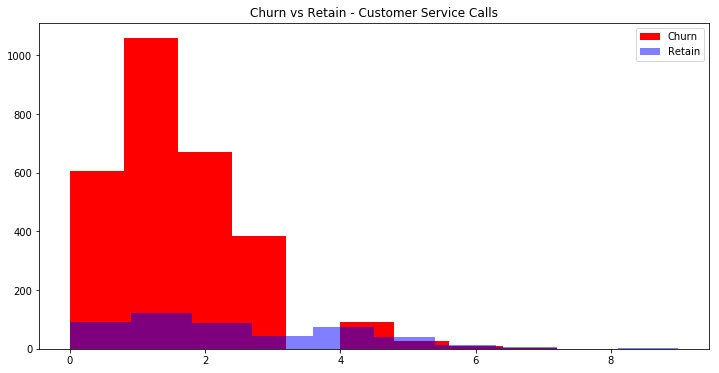

In [17]:
fig, ax = plt.subplots(figsize=(12,6))
plt.hist(df.loc[(df['Churn'] == 0) ]['CustServ Calls'], color="r",  label='Churn')
plt.hist(df.loc[(df['Churn'] == 1) ]['CustServ Calls'], color="b", alpha=0.50, label='Retain')
ax.set_title('Churn vs Retain - Customer Service Calls')
ax.legend()

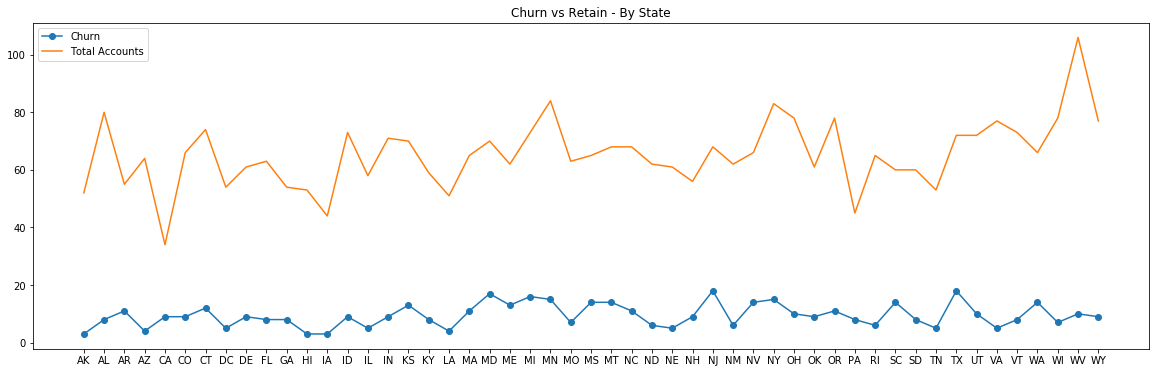

In [20]:
fig, ax = plt.subplots(figsize=(20,6))
ax.plot(df.groupby(['State'])['Churn'].sum(), marker='o')
ax.plot(df.groupby(['State'])['State'].count(), label='Total Accounts')
ax.set_title('Churn vs Retain - By State')
ax.legend()

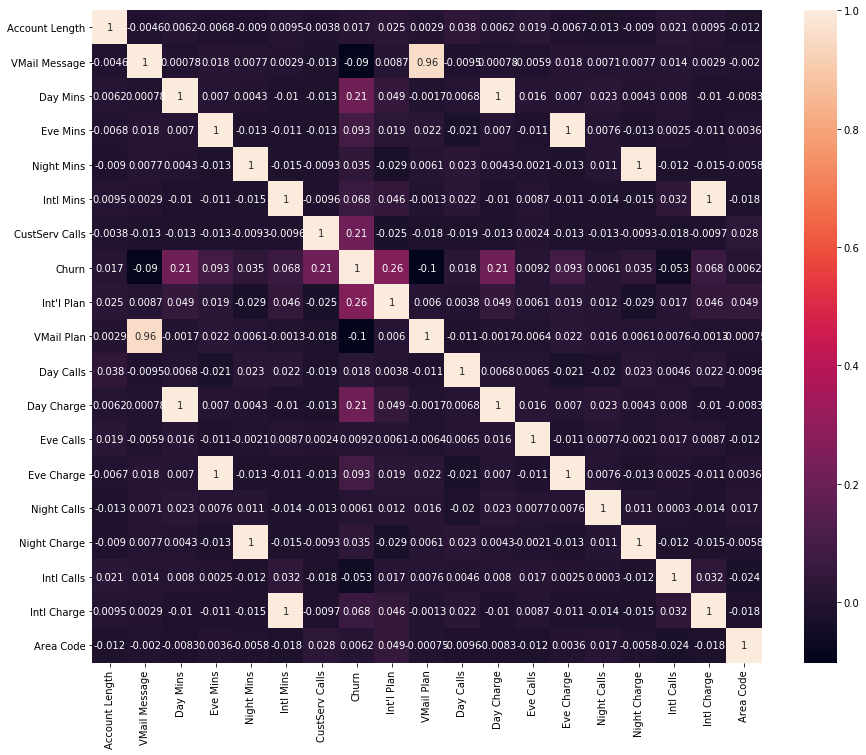

In [151]:
fig, ax = plt.subplots(figsize=(15, 12))
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot=True,
           ax=ax)

Through the plots above and the heat map shows us there are some features that correlate well with Churn (Day mins, CustServ Calls, Intl Plan). Some of the others can be deleted - which we will do next.

In [182]:
# Drop features that we willnot be using for prediction

df = df.drop(["Phone", "Area Code", "State", 'VMail Message', 'VMail Plan' ], axis=1)
features = df.drop(["Churn"], axis=1).columns

In [183]:
# Create training and test datasets

df_train, df_test = train_test_split(df, test_size=0.25)

In [184]:
# Set up our RandomForestClassifier and fit to data
clf = RandomForestClassifier(n_estimators=30)
clf.fit(df_train[features], df_train["Churn"])

# Make predictions
predictions = clf.predict(df_test[features])
probs = clf.predict_proba(df_test[features])

# Check score of classifier
score = clf.score(df_test[features], df_test["Churn"])
print("Accuracy: ", score)

Accuracy:  0.931654676259


,Predicted False,Predicted True
Actual False,715,13
Actual True,44,62


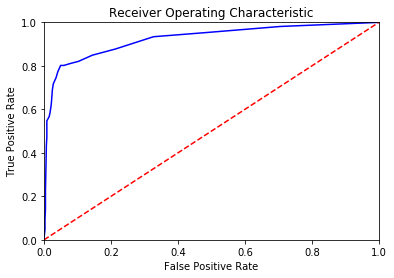

In [185]:
# That score is good, but lets check the confusion matrix and plot a ROC curve for the results

cm = pd.DataFrame(confusion_matrix(df_test["Churn"], predictions), columns=["Predicted False", "Predicted True"], 
    index=["Actual False", "Actual True"])
display(cm)

# Calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = roc_curve(df_test["Churn"], probs[:,1])
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

,importance,labels
8,0.147071,Day Charge
1,0.137640,Day Mins
5,0.108593,CustServ Calls
6,0.085771,Int'l Plan
10,0.069510,Eve Charge


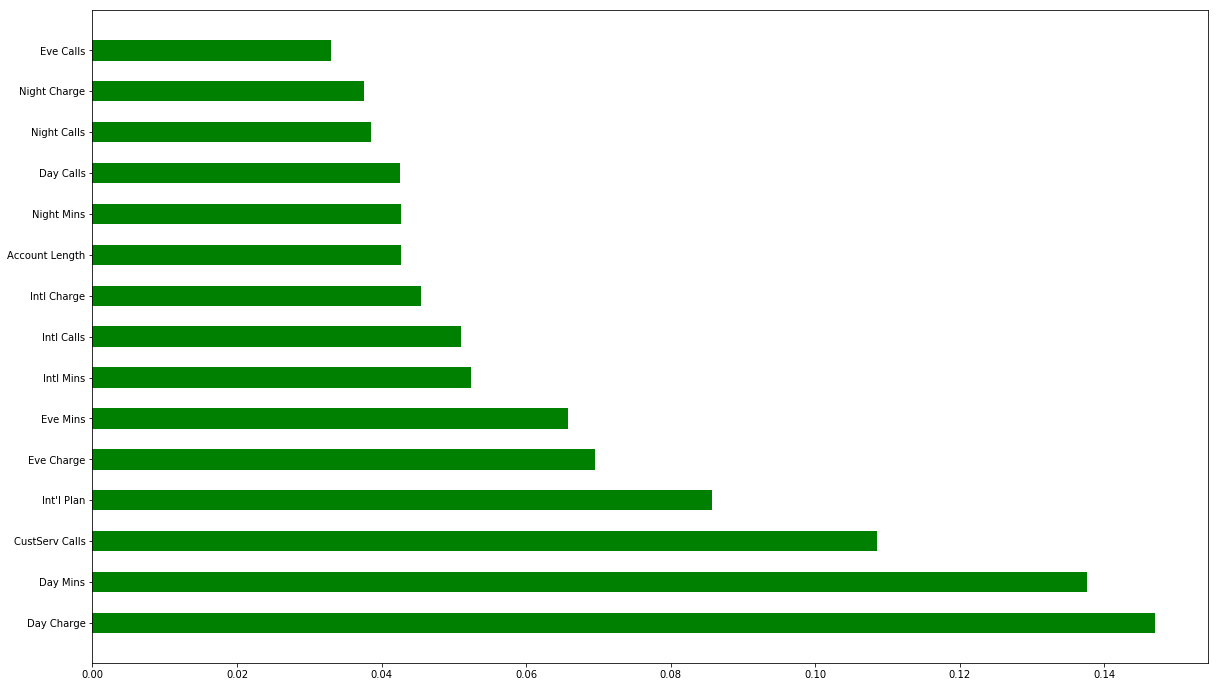

In [186]:
# Lets check the feature importance and if our previous assumptions were good

fig = plt.figure(figsize=(20, 12))
ax = fig.add_subplot(111)

df_f = pd.DataFrame(clf.feature_importances_, columns=["importance"])
df_f["labels"] = features
df_f.sort_values("importance", inplace=True, ascending=False)
display(df_f.head(5))

index = np.arange(len(clf.feature_importances_))
bar_width = 0.5
rects = plt.barh(index , df_f["importance"], bar_width, color='g', label='Main')
plt.yticks(index, df_f["labels"])
plt.show()

In [187]:
# Set up our GaussianNB and fit to data
clf = GaussianNB()
clf.fit(df_train[features], df_train["Churn"])

# Make predictions
predictions = clf.predict(df_test[features])
probs = clf.predict_proba(df_test[features])

# Check score of classifier
score = clf.score(df_test[features], df_test["Churn"])
print("Accuracy: ", score)

Accuracy:  0.857314148681


,Predicted False,Predicted True
Actual False,672,56
Actual True,63,43


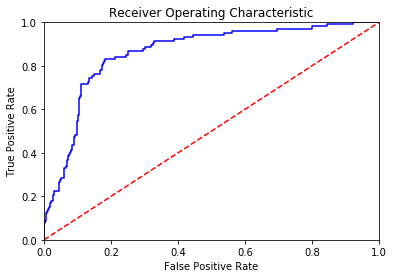

In [188]:
# That score is good, but lets check the confusion matrix and plot a ROC curve for the results

cm3 = pd.DataFrame(confusion_matrix(df_test["Churn"], predictions), columns=["Predicted False", "Predicted True"], index=["Actual False", "Actual True"])
display(cm3)

# Calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = roc_curve(df_test["Churn"], probs[:,1])
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


Random Forest is clearly giving us a better result, but cross validating would decrease the chances of overfitting and give us a more accurate performance. Let's do that next.

In [189]:
# Cross validate the Random Forest classifier (5 fold)

clf = RandomForestClassifier(n_estimators=30)
scores = cross_val_score(clf,df[features], df["Churn"], cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))                       

Accuracy: 0.93 (+/- 0.02)
